# Jupyter notebook for analyzing multiExR synapse data
* data from first mouse (S0)
* Last modified by MES on 12/12/2022

In [1]:
#import relevant packages
import os
import numpy as np
#from skimage import io
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import robust_scale
from sklearn.cluster import KMeans
import scanpy as sc
import anndata
#import leidenalg
#import igraph as ig
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [2]:
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    return unique_list

In [3]:
filenames = os.listdir()
csvs = [filename for filename in filenames if filename.endswith('csv') and 'all' in filename]

In [4]:
csvs

[]

In [5]:
os.getcwd()

'/Users/margaret/Dropbox (MIT)/mExR_analysis/Scripts/Python'

In [6]:
sc.set_figure_params(dpi=80)

In [7]:
parentdir = '/Users/margaret/Dropbox (MIT)/mExR_analysis/SmallData/2022.08_synapses/multichannel_data/'

In [8]:
os.listdir(parentdir)

['allsynapsedata_20221030.csv',
 'allsynapsedata_20221019.csv',
 'allsynapsedata_ROI4_20221120.csv',
 'allsynapsedata_20221027.csv',
 'allsynapsedata_ROI5_20221119.csv',
 'allsynapsedata_20221026.csv',
 '.DS_Store',
 'allsynapsedata_202225.csv',
 'allsynapsedata_20221020.csv',
 'allsynapsedata_20221120.csv',
 'allsynapsedata_20221016.csv',
 'allsynapsedata_20221028.csv',
 'allsynapsedata_20221014.csv']

In [9]:
data = pd.read_csv(parentdir + 'allsynapsedata_20221120.csv',index_col='variable')

In [10]:
data

,ROI1_syn1,ROI1_syn2,ROI1_syn3,ROI1_syn4,ROI1_syn5,ROI1_syn6,ROI1_syn7,ROI1_syn8,ROI1_syn9,ROI1_syn10,...,ROI5_syn29,ROI5_syn30,ROI5_syn31,ROI5_syn32,ROI5_syn33,ROI5_syn34,ROI5_syn35,ROI5_syn36,ROI5_syn37,ROI5_syn38
variable,,,,,,,,,,,,,,,,,,,,,
npuncta_Bassoon,6.000000,5.000000,4.000000,13.000000,5.000000,17.000000,6.000000,16.000000,12.000000,13.000000,...,4.000000,4.000000,3.000000,6.000000,8.000000,3.000000,8.000000,1.000000,20.000000,11.000000
npuncta_SynGAP,3.000000,10.000000,12.000000,2.000000,0.000000,1.000000,2.000000,1.000000,7.000000,6.000000,...,4.000000,3.000000,1.000000,5.000000,7.000000,7.000000,8.000000,1.000000,8.000000,15.000000
npuncta_NR1,2.000000,6.000000,0.000000,21.000000,2.000000,12.000000,3.000000,5.000000,3.000000,6.000000,...,5.000000,14.000000,5.000000,6.000000,9.000000,6.000000,12.000000,1.000000,9.000000,12.000000
npuncta_Homerref1,7.000000,12.000000,9.000000,13.000000,14.000000,16.000000,15.000000,10.000000,12.000000,10.000000,...,5.000000,10.000000,18.000000,14.000000,17.000000,0.000000,8.000000,8.000000,2.000000,7.000000
npuncta_Shank3,3.000000,2.000000,9.000000,5.000000,3.000000,9.000000,8.000000,8.000000,9.000000,13.000000,...,6.000000,0.000000,6.000000,7.000000,10.000000,0.000000,6.000000,4.000000,23.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
std_distance_Homerref11-Synaptophysin,0.053861,0.102907,0.021273,0.022716,0.056651,0.049166,0.047367,0.049652,0.123115,0.045312,...,0.139199,0.084819,0.065487,0.067150,0.038721,0.126935,0.028850,0.363181,0.042482,0.065318
std_distance_Homerref11-NR1R10,0.435545,0.151119,0.067132,0.062504,NaN,0.090029,0.119512,0.058611,0.212197,0.043253,...,0.338863,0.140968,0.093015,0.081514,0.041141,0.221623,0.048129,0.308259,0.071048,0.186391
std_distance_Homerref11-Homerref10,0.037917,0.040335,0.024378,0.025723,0.074950,0.020528,0.020694,0.030298,0.104603,0.026457,...,0.094637,0.070994,0.034029,0.108638,0.033357,0.206299,NaN,0.153592,0.047240,0.219317


In [11]:
data = data.T

In [12]:
data = data.replace(np.inf, np.nan)

In [13]:
#data = data.fillna(0)

In [14]:
#data = np.abs(data)

In [15]:
np.any(np.isnan(data))

True

In [16]:
np.all(np.isfinite(data))

False

In [17]:
data.shape

(181, 7849)

In [18]:
data = data[(data['size']>0)]

In [19]:
#delete "ctrl" features
data = data[data.columns.drop(list(data.filter(regex='ctrl')))]

In [20]:
data.shape

(172, 6589)

In [21]:
var_names = list(data)

In [22]:
list(data)

['npuncta_Bassoon',
 'npuncta_SynGAP',
 'npuncta_NR1',
 'npuncta_Homerref1',
 'npuncta_Shank3',
 'npuncta_GluA1',
 'npuncta_CaMKII',
 'npuncta_Homerref2',
 'npuncta_Cav2.1',
 'npuncta_NR2B',
 'npuncta_RIM1',
 'npuncta_Homerref3',
 'npuncta_PSD95',
 'npuncta_Gephyrin',
 'npuncta_Homerref4',
 'npuncta_Vglut',
 'npuncta_Vgat',
 'npuncta_Homerref5',
 'npuncta_mGluR5',
 'npuncta_PSD95R6',
 'npuncta_Homerref6',
 'npuncta_RIMBP',
 'npuncta_Adam22',
 'npuncta_Homerref7',
 'npuncta_GluA3',
 'npuncta_Stargazin',
 'npuncta_Homerref8',
 'npuncta_Synapsin1',
 'npuncta_GABAB',
 'npuncta_Homerref9',
 'npuncta_Synaptophysin',
 'npuncta_NR1R10',
 'npuncta_Homerref10',
 'npuncta_GluA4',
 'npuncta_GluA2',
 'npuncta_Homerref11',
 'size',
 'frac_vol_occ_Bassoon',
 'frac_vol_occ_SynGAP',
 'frac_vol_occ_NR1',
 'frac_vol_occ_Homerref1',
 'frac_vol_occ_Shank3',
 'frac_vol_occ_GluA1',
 'frac_vol_occ_CaMKII',
 'frac_vol_occ_Homerref2',
 'frac_vol_occ_Cav2.1',
 'frac_vol_occ_NR2B',
 'frac_vol_occ_RIM1',
 'frac_vo

## Examine properties of Geph+ vs. Geph- synapses

<AxesSubplot:>

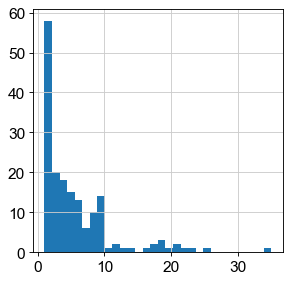

In [23]:
data['npuncta_PSD95'].hist(bins=30)

<AxesSubplot:>

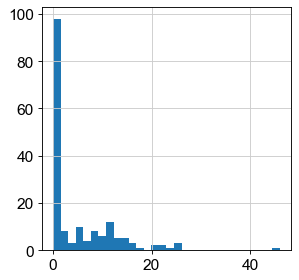

In [24]:
data['npuncta_Gephyrin'].hist(bins=30)

<AxesSubplot:>

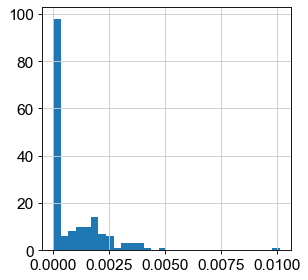

In [25]:
data['frac_vol_occ_Gephyrin'].hist(bins=30)

In [26]:
# #set anything with >10 puncta equal to zero (assume this is noise)
# npuncta_Geph_reset = []
# for idx,row in data.iterrows():
#     if row['npuncta_Gephyrin'] > 10:
#         print(row['npuncta_Gephyrin'])
#         npuncta_Geph = 0
#     else:
#         npuncta_Geph = row['npuncta_Gephyrin']
#     npuncta_Geph_reset.append(npuncta_Geph)

In [27]:
# data['npuncta_Gephyrin'] = npuncta_Geph_reset

In [28]:
data['Geph+'] = data['frac_vol_occ_Gephyrin']>0.002

In [29]:
data['Geph+'].value_counts()

False    146
True      26
Name: Geph+, dtype: int64

In [30]:
#run multiple t-tests; will have to correct these somehow
pvals=[]
for comparison in list(data):
    cat1 = data[data['Geph+']==True]
    cat1 = cat1[comparison]
    cat2 = data[data['Geph+']==False]
    cat2 = cat2[comparison]
    
    t,p = ttest_ind(cat1, cat2)
    pvals.append(p)

/var/folders/71/pthjj8vn7h9596hzsrwryp1w0000gn/T/ipykernel_13961/4038233810.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t,p = ttest_ind(cat1, cat2)


In [31]:
from statsmodels.stats.multitest import multipletests

In [32]:
#implement multiple comparisons correction
reject,pvals_corrected,_,_ = multipletests(pvals, alpha=0.05, method='fdr_bh',
                                                          is_sorted=False, returnsorted=False)

In [33]:
for idx,comparison in enumerate(list(data)):
    if reject[idx]:
        print(comparison)

frac_vol_occ_Gephyrin
mean_puncta_vol_Gephyrin
med_puncta_vol_Gephyrin
std_puncta_vol_Gephyrin
mean_puncta_SA_Gephyrin
med_puncta_SA_Gephyrin
std_puncta_SA_Gephyrin
Geph+


In [34]:
vol_converter = 1.2073e-6

In [35]:
#what fraction of synapses have Gephyrin?
data['Geph+'].value_counts()[True] / len(data)

0.1511627906976744

## Are there any purely inhibitory synapses?

In [36]:
data[data['Geph+']==False]['npuncta_PSD95'].value_counts(normalize=True).sort_index().to_clipboard()

In [37]:
data[data['Geph+']==True]['npuncta_PSD95'].value_counts(normalize=True).sort_index().to_clipboard()

In [38]:
data[data['Geph+']==True]['size'].count()

26

In [39]:
data[data['Geph+']==False]['size'].count()

146

## Dimensionality reduction and clustering

In [40]:
data.dropna(axis=1, how='all', inplace=True)

In [41]:
#impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(data)
  
data_clean = imputer.transform(data)

In [42]:
np.any(np.isnan(data_clean))

False

In [43]:
np.all(np.isfinite(data_clean))

True

In [44]:
len(list(data))

6590

In [45]:
data_clean.shape

(172, 6590)

In [46]:
adata = anndata.AnnData(data_clean)
adata.var_names=list(data)
adata.obs_names=list(data.index)

/var/folders/71/pthjj8vn7h9596hzsrwryp1w0000gn/T/ipykernel_13961/2028681034.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(data_clean)


In [47]:
fovs_list = []
for idx, row in data.iterrows():
    splits = idx.split("_")
    fov = splits[0]
    fovs_list.append(fov)
adata.obs['fov'] = fovs_list

## 2) Using scanpy

In [48]:
#exlude variables with proteins that had poor staining
excludes = []
for var in adata.var_names:
    if 'mGluR' in var:
        excludes.append(False)
    elif 'Adam' in var:
        excludes.append(False)
    elif 'Synapsin' in var:
        excludes.append(False)
    elif 'GABA' in var:
        excludes.append(False)
    elif 'Synapto' in var:
        excludes.append(False)
    elif 'GluA4' in var:
        excludes.append(False)
    elif 'ref' in var:
        excludes.append(False)
    else:
        excludes.append(True)

In [49]:
adata = adata[:,excludes].copy()

In [50]:
adata.X

array([[ 6.        ,  3.        ,  2.        , ...,  0.28036174,
         1.4466112 ,  0.        ],
       [ 5.        , 10.        ,  6.        , ...,  0.31919017,
         0.55923533,  0.        ],
       [ 4.        , 12.        ,  0.        , ...,  0.0964286 ,
         0.24730098,  0.        ],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  0.22010083,
         0.2565077 ,  0.        ],
       [20.        ,  8.        ,  9.        , ...,  0.22010083,
         0.11325764,  0.        ],
       [11.        , 15.        , 12.        , ...,  0.22010083,
         0.16989386,  0.        ]], dtype=float32)

In [51]:
adata.raw=adata

In [52]:
sc.pp.normalize_total(adata)#normalizes on a per-synapse basis. so each synapse has values summing to 1
sc.pp.log1p(adata)#log 1+p
sc.pp.scale(adata,zero_center=True,max_value=10)

In [53]:
np.any(np.isnan(adata.X))

False

In [54]:
sc.tl.pca(adata, svd_solver='arpack')

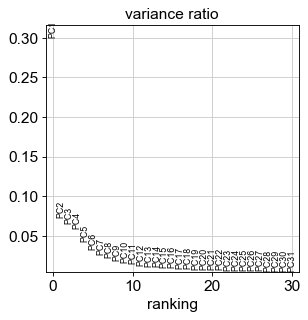

In [55]:
sc.pl.pca_variance_ratio(adata)

In [56]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

In [57]:
sc.tl.umap(adata)

In [58]:
sc.tl.leiden(adata,resolution=0.3)

In [59]:
sc.set_figure_params(dpi=300)

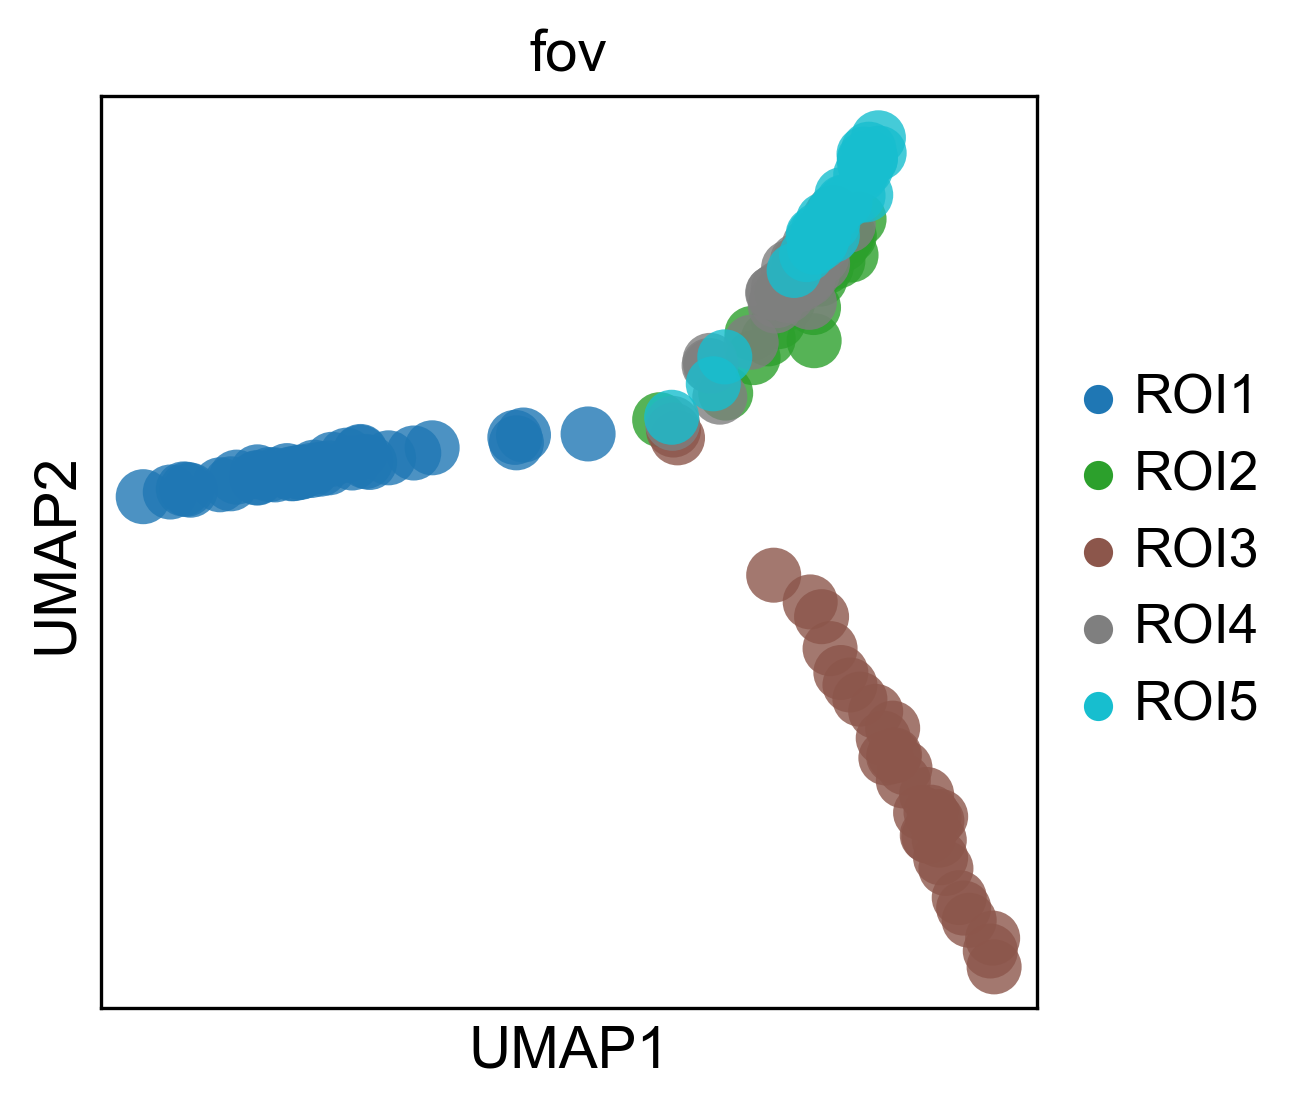

In [60]:
sc.pl.umap(adata, color=['fov'],ncols=1,alpha=0.8,palette='tab10')

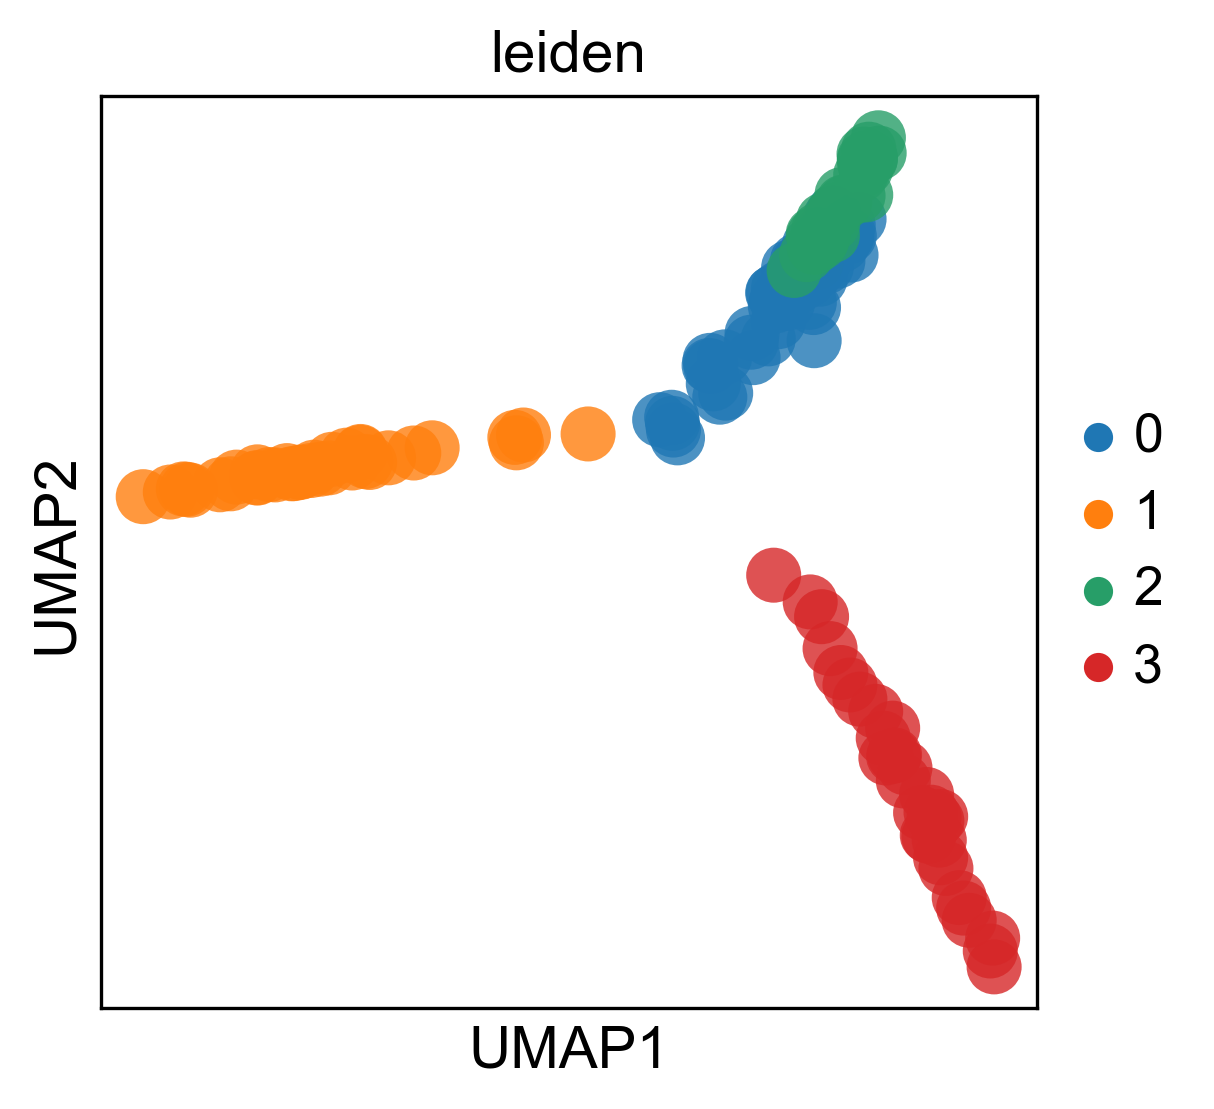

In [61]:
sc.pl.umap(adata, color=['leiden'], alpha = 0.8,ncols=1)

In [62]:
adata.obs['fov'].value_counts()

ROI1    36
ROI4    36
ROI5    35
ROI3    34
ROI2    31
Name: fov, dtype: int64

In [63]:
clusters = ['0','1','2','3']

In [64]:
for cluster in clusters:
    adata_sub = adata[adata.obs['leiden']==cluster]
    print(cluster)
    print(adata_sub.obs['fov'].value_counts(normalize=True))

0
ROI4    0.507042
ROI2    0.422535
ROI5    0.042254
ROI3    0.028169
Name: fov, dtype: float64
1
ROI1    1.0
Name: fov, dtype: float64
2
ROI5    0.969697
ROI2    0.030303
Name: fov, dtype: float64
3
ROI3    1.0
Name: fov, dtype: float64


**Select only clusters that have >1 field of view represented**

In [65]:
adata_new = adata[(adata.obs['leiden']!='1') &
                  (adata.obs['leiden']!='3')
                     ].copy()

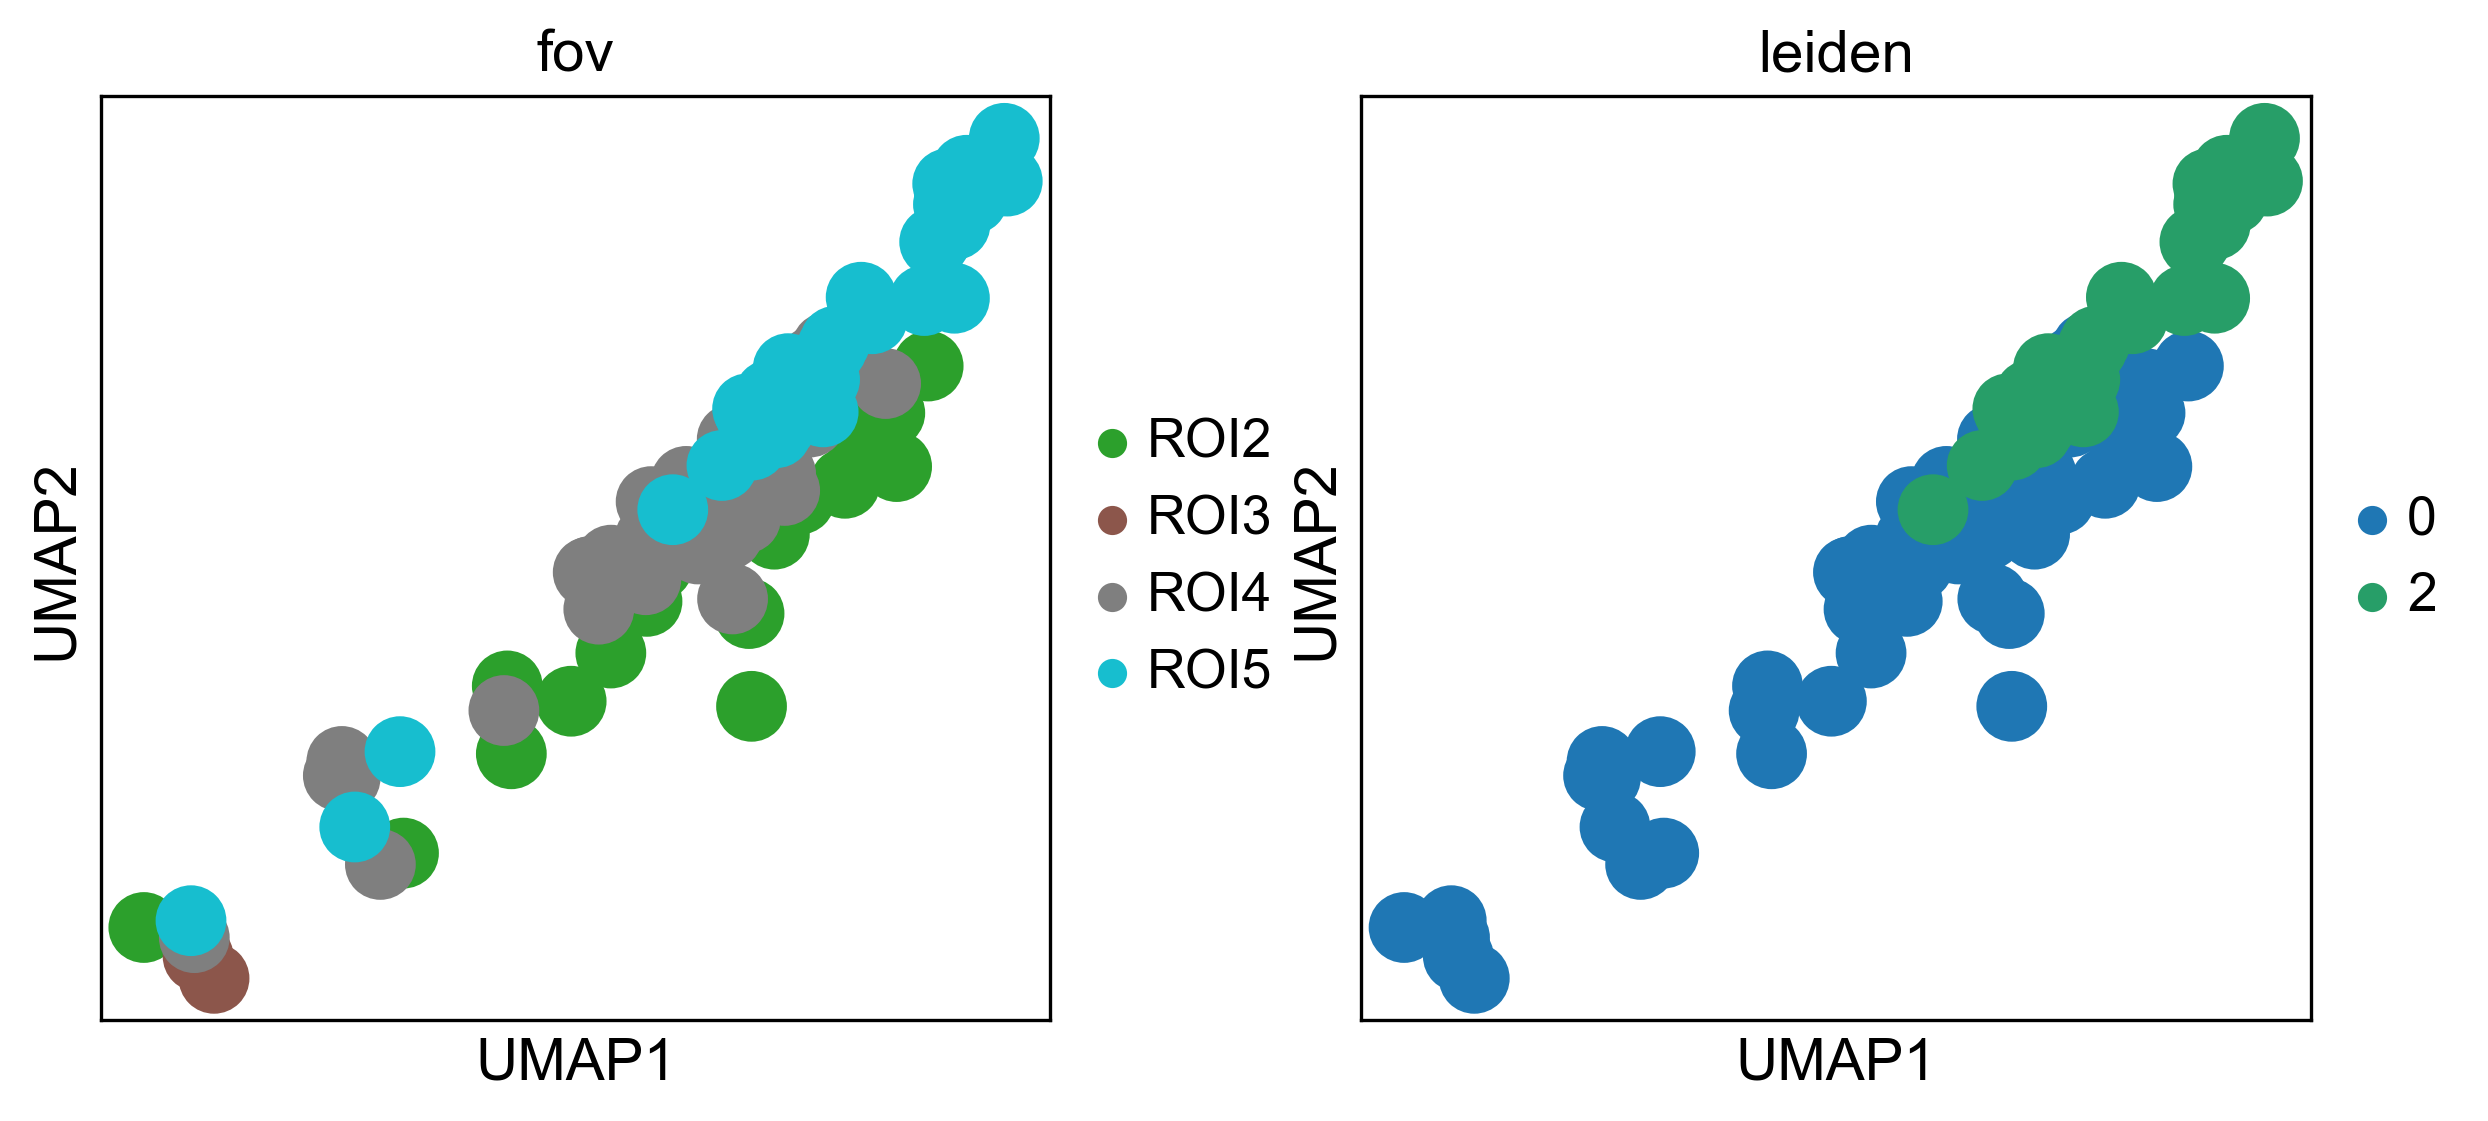

In [66]:
sc.pl.umap(adata_new,color=['fov','leiden'])

In [67]:
clusters = ['0','2']

In [68]:
for cluster in clusters:
    adata_sub = adata_new[adata_new.obs['leiden']==cluster]
    print(cluster)
    print(adata_sub.obs['fov'].value_counts(normalize=True))

0
ROI4    0.507042
ROI2    0.422535
ROI5    0.042254
ROI3    0.028169
Name: fov, dtype: float64
2
ROI5    0.969697
ROI2    0.030303
Name: fov, dtype: float64


In [69]:
adata_new.shape

(104, 1864)

In [70]:
adata_new.obs['fov'].value_counts()

ROI4    36
ROI5    35
ROI2    31
ROI3     2
Name: fov, dtype: int64

/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


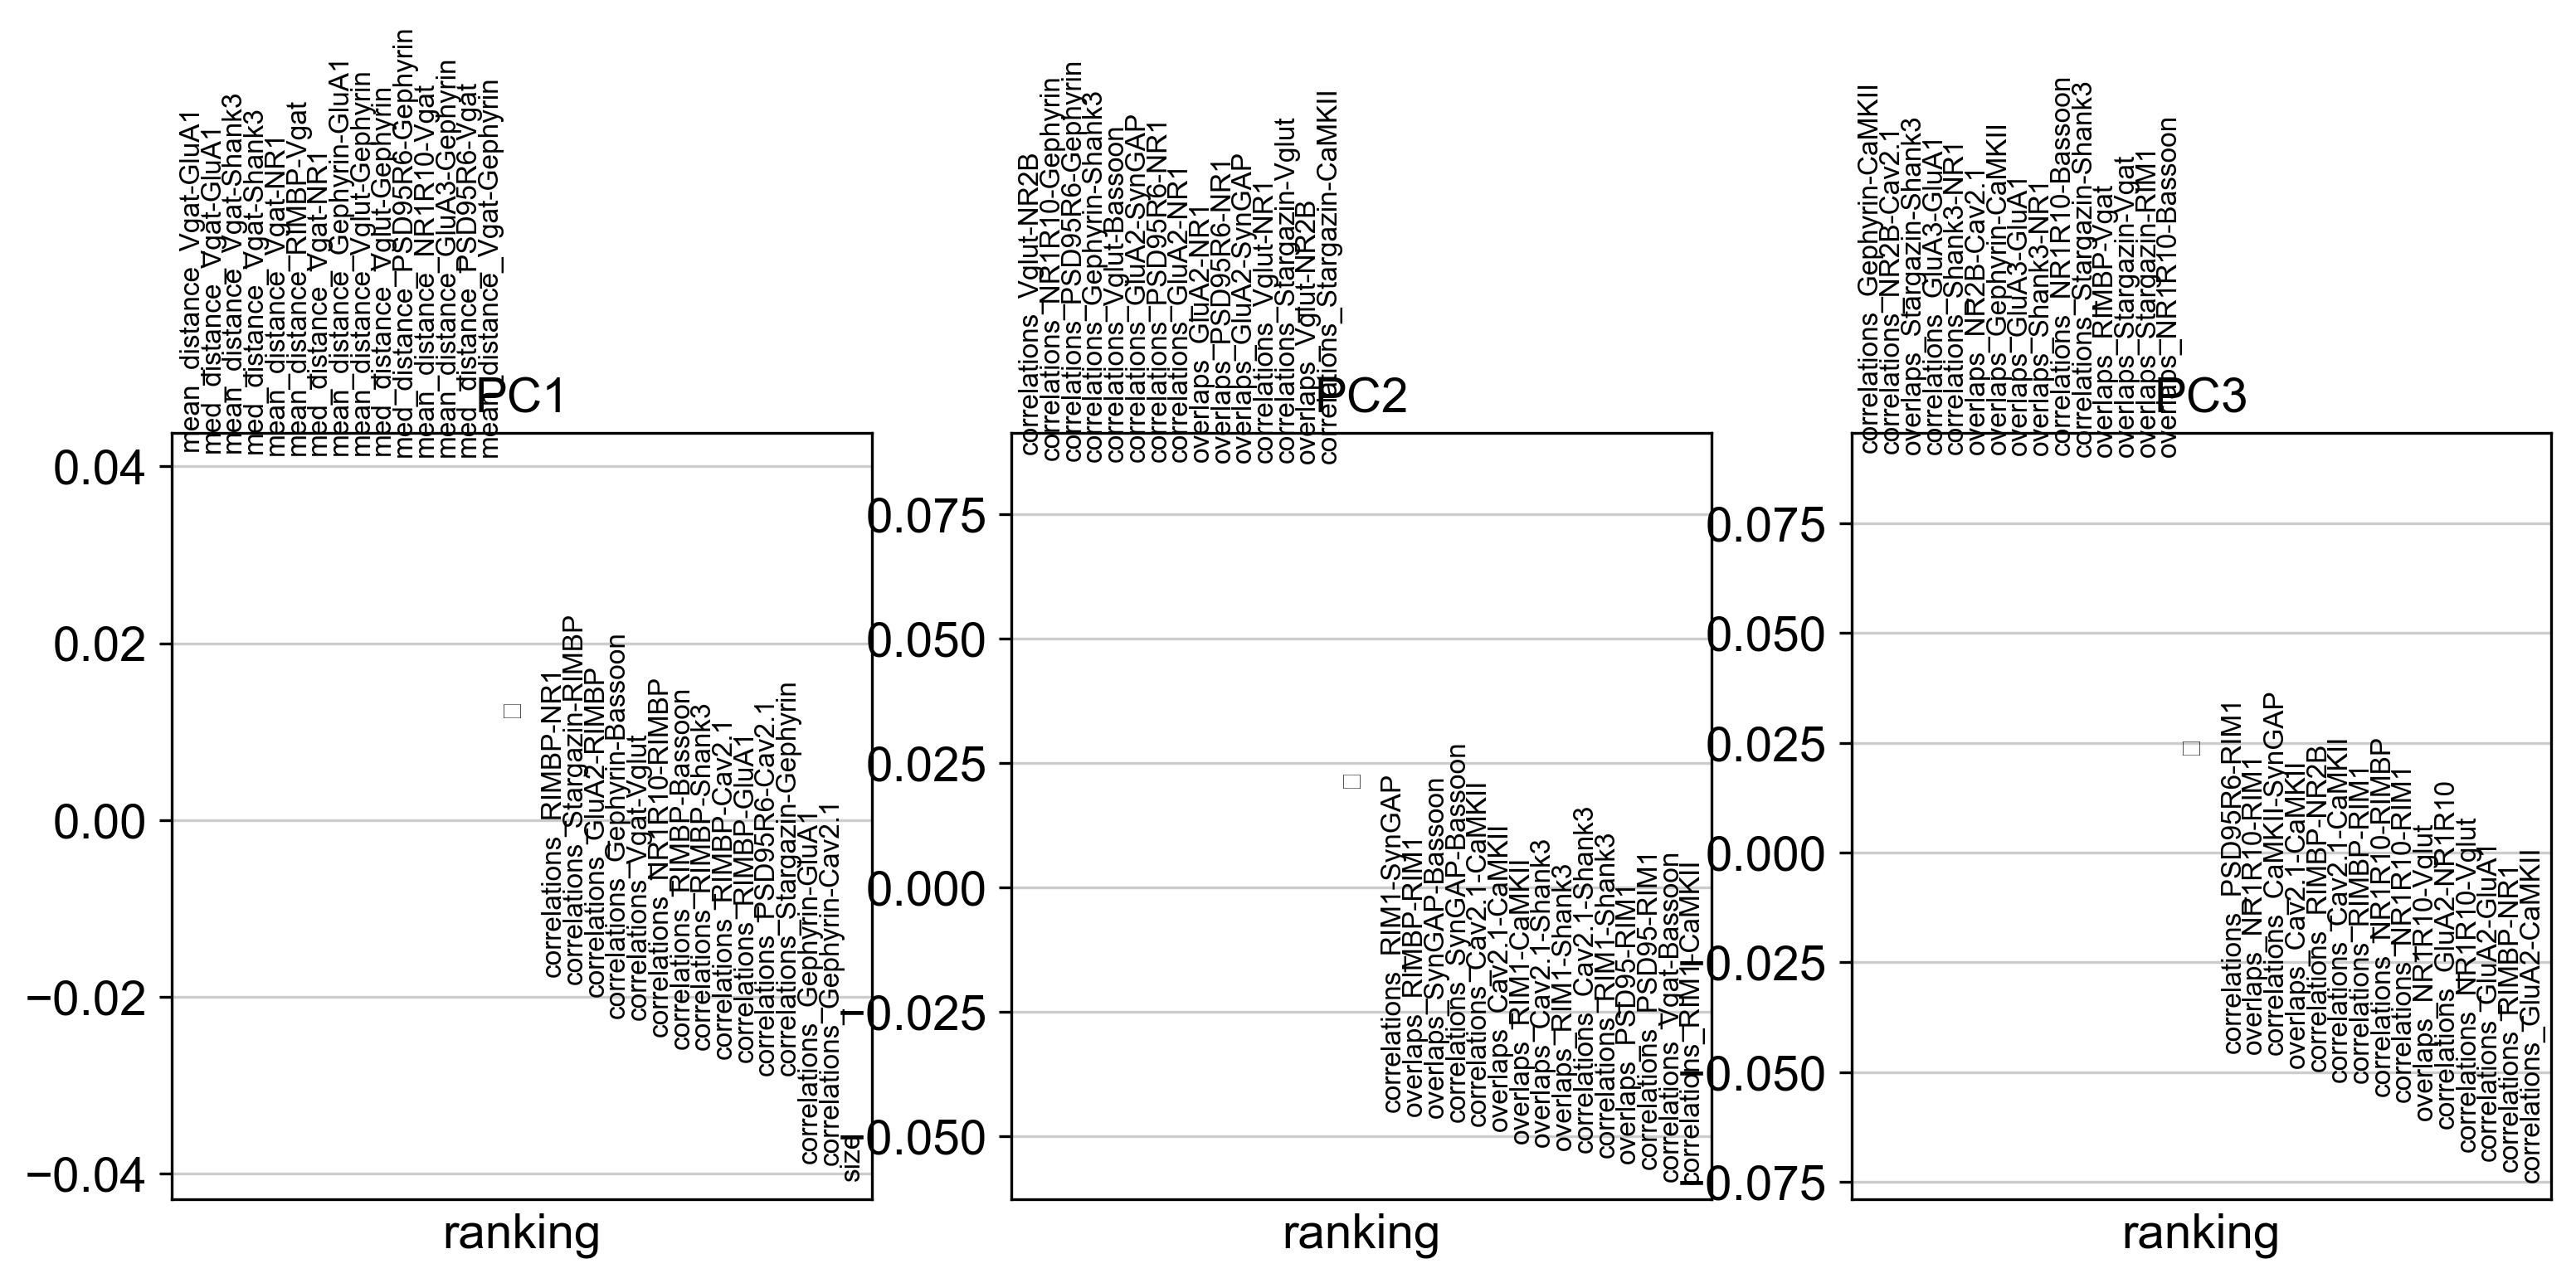

In [71]:
sc.pl.pca_loadings(adata_new)

In [72]:
#extract marker features for each cluster
sc.tl.rank_genes_groups(adata_new, groupby='leiden',method='wilcoxon')

/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [73]:
markers = pd.DataFrame(adata_new.uns['rank_genes_groups']['names']).head(10)

In [74]:
markers

,0,2
0,correlations_GluA2-Shank3,overlaps_PSD95-Cav2.1
1,correlations_NR1R10-Cav2.1,correlations_PSD95R6-Bassoon
2,correlations_GluA2-PSD95,overlaps_Cav2.1-CaMKII
3,overlaps_Vglut-NR2B,correlations_GluA3-RIM1
4,overlaps_Vglut-RIM1,correlations_GluA3-Cav2.1
5,correlations_Vglut-SynGAP,correlations_GluA3-Bassoon
6,correlations_Vglut-NR1,overlaps_PSD95-Bassoon
7,correlations_NR1R10-NR2B,correlations_RIMBP-NR1
8,overlaps_GluA3-PSD95R6,overlaps_PSD95-RIM1
9,correlations_CaMKII-Shank3,overlaps_GluA3-RIM1


In [75]:
marker_vars = list(markers.loc[0,:])

In [76]:
marker_vars.append('size')

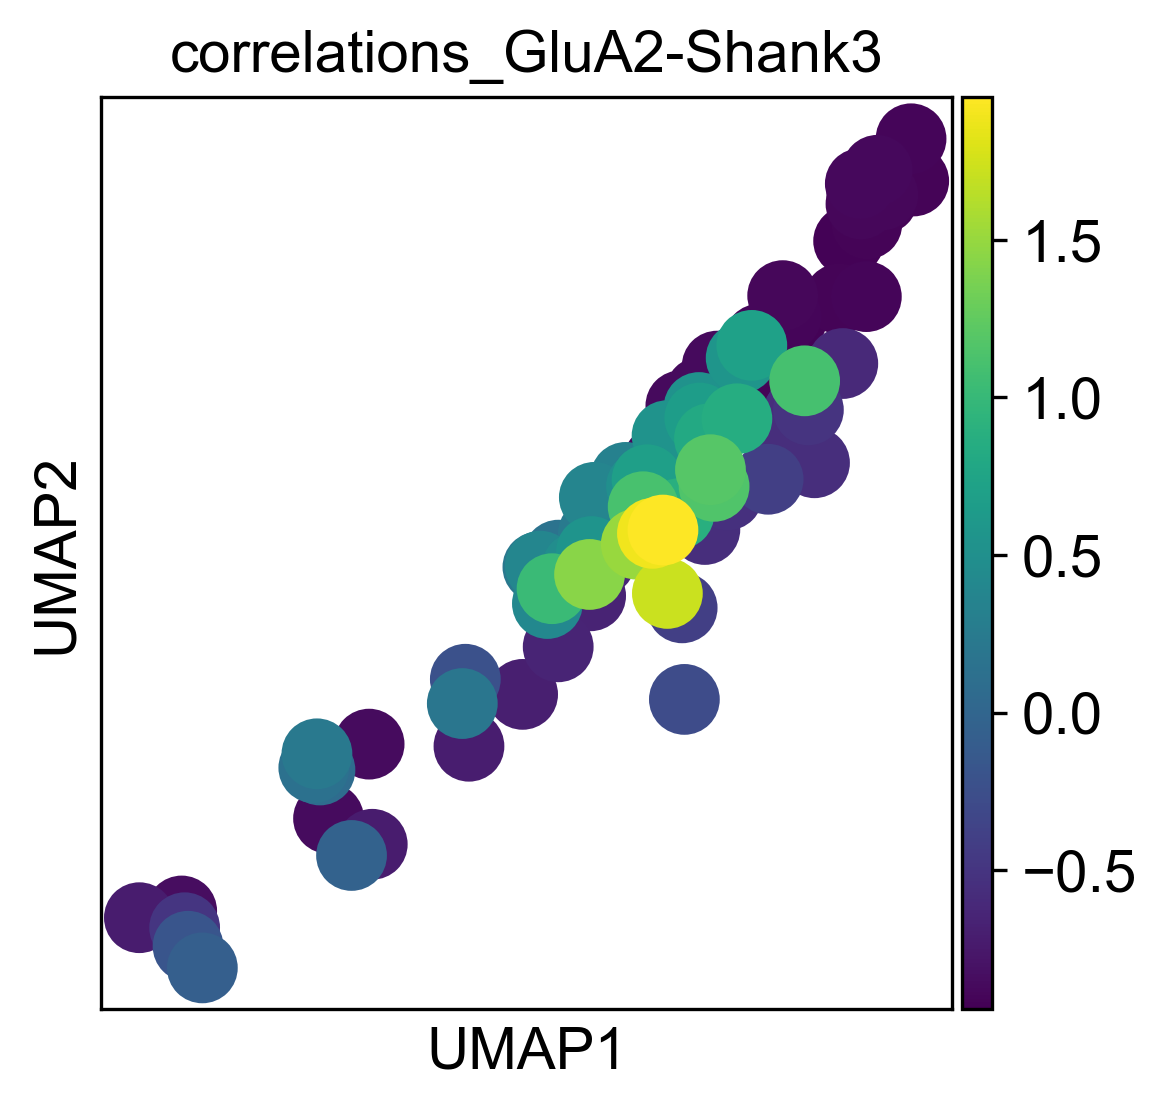

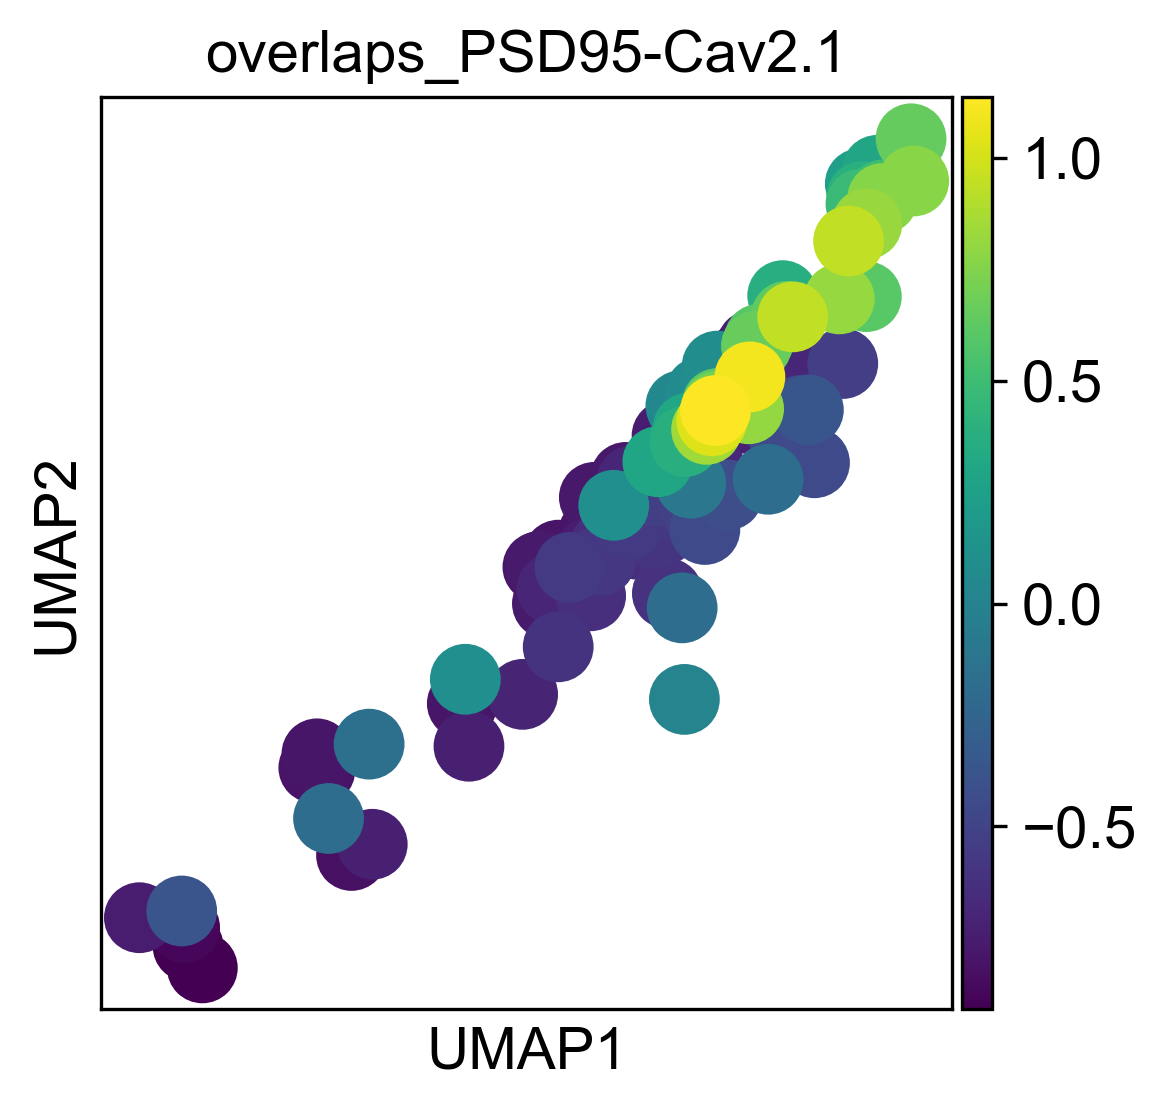

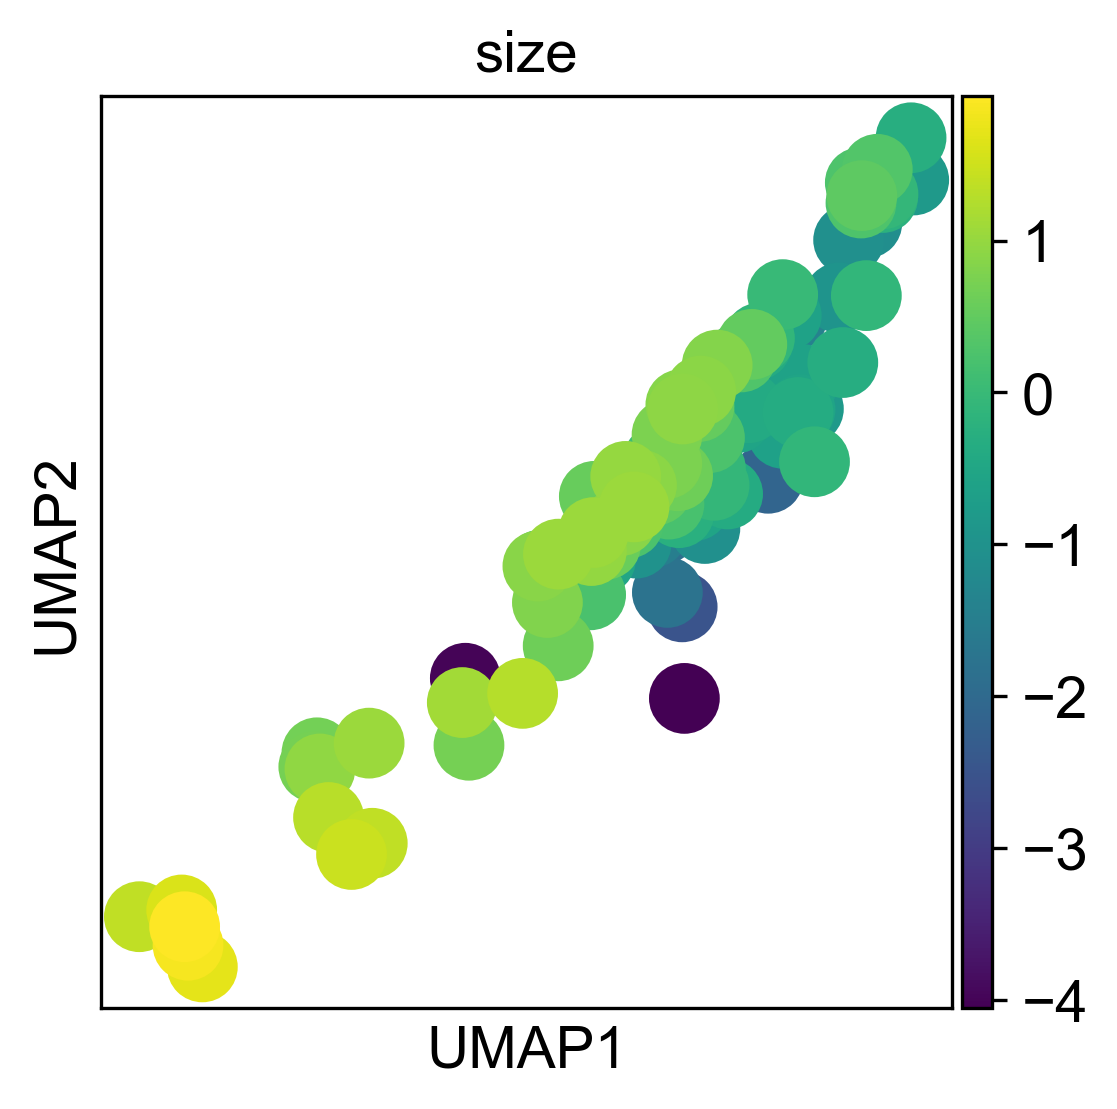

In [77]:
for marker in marker_vars:
    sc.pl.umap(adata_new, color = marker,use_raw=False)

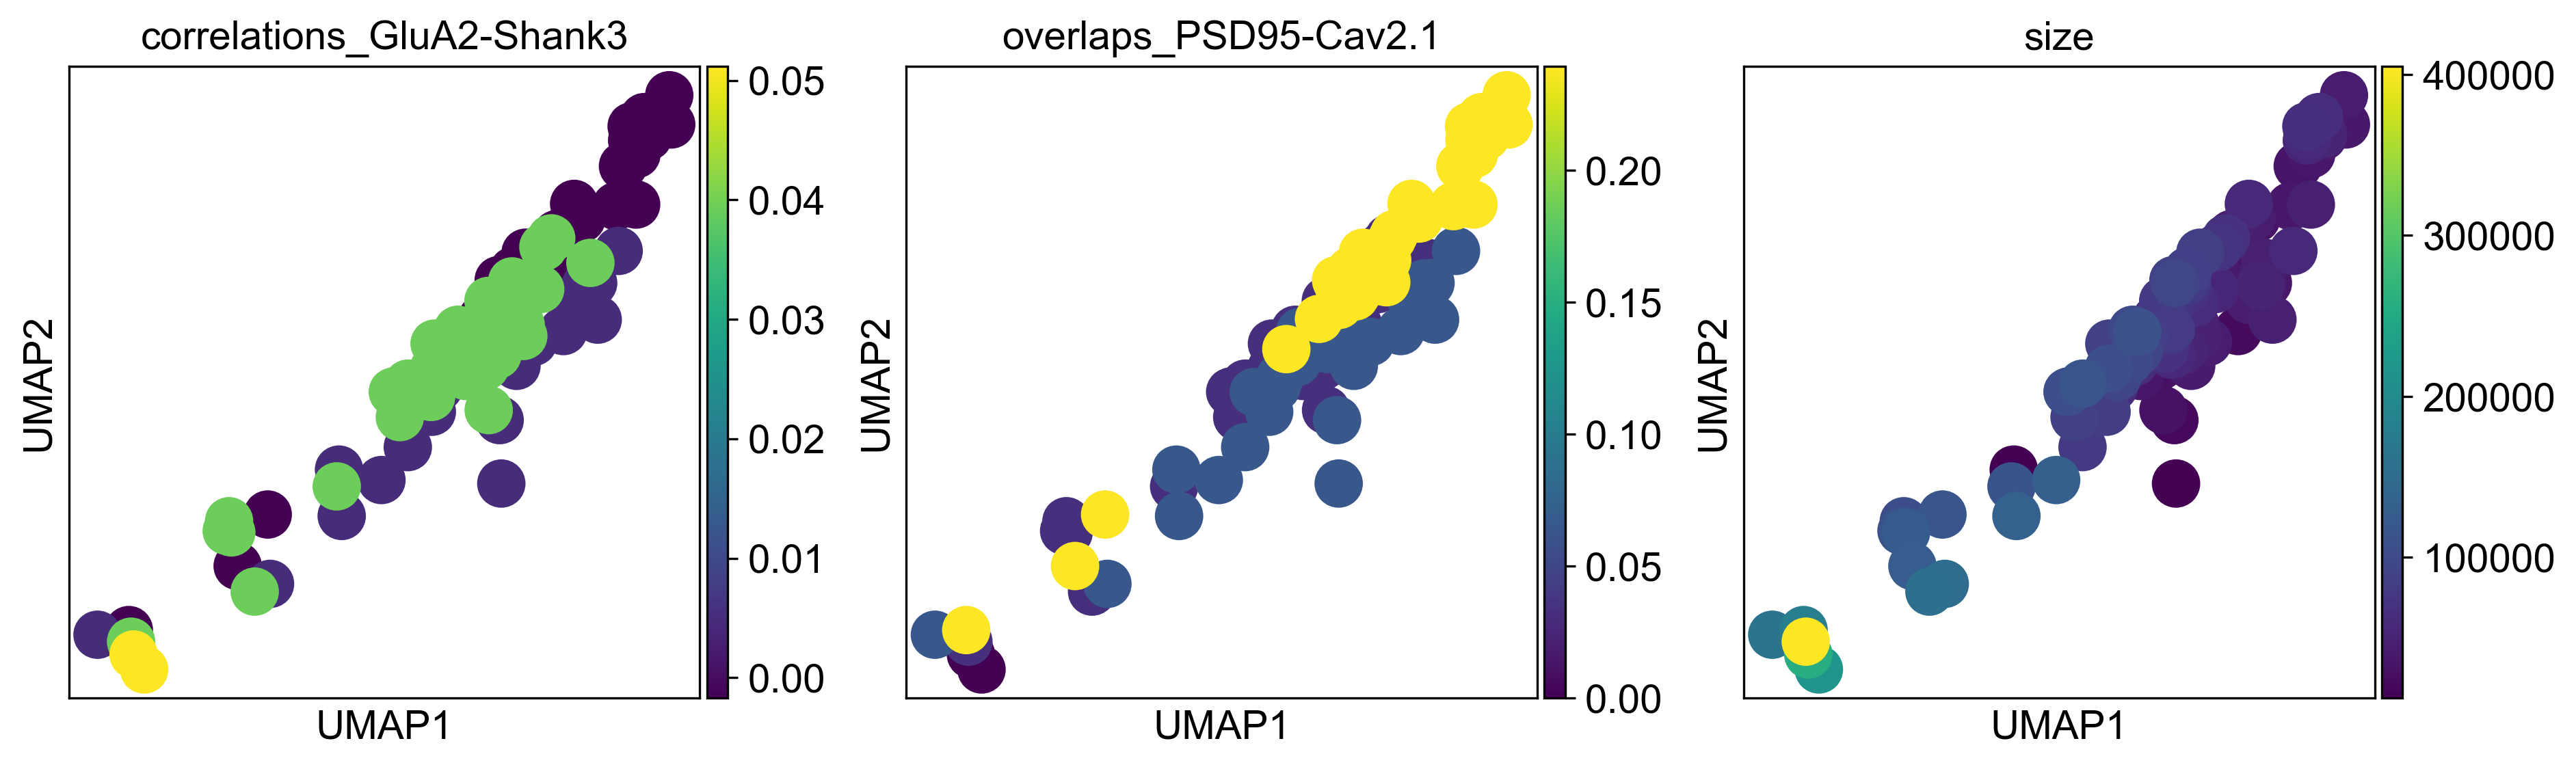

In [78]:
sc.pl.umap(adata_new, color = marker_vars,use_raw=True,ncols=3)

## Repeat clustering analysis on ROI5 only, as has lowest registration error

In [79]:
np.all(np.isfinite(data_clean))

True

In [83]:
adata = anndata.AnnData(data_clean)
adata.var_names=list(data)
adata.obs_names=list(data.index)

fovs_list = []
for idx, row in data.iterrows():
    splits = idx.split("_")
    fov = splits[0]
    fovs_list.append(fov)
adata.obs['fov'] = fovs_list

/var/folders/71/pthjj8vn7h9596hzsrwryp1w0000gn/T/ipykernel_13961/2745626385.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(data_clean)


In [84]:
#exlude variables with proteins that had poor staining
excludes = []
for var in adata.var_names:
    if 'mGluR' in var:
        excludes.append(False)
    elif 'Adam' in var:
        excludes.append(False)
    elif 'Synapsin' in var:
        excludes.append(False)
    elif 'GABA' in var:
        excludes.append(False)
    elif 'Synapto' in var:
        excludes.append(False)
    elif 'GluA4' in var:
        excludes.append(False)
    else:
        excludes.append(True)

In [85]:
adata_new = adata[:,excludes].copy()

In [86]:
adata_roi5 = adata_new[adata_new.obs['fov']=='ROI5'].copy()

In [87]:
adata_roi5.raw = adata_roi5

In [88]:
sc.pp.normalize_total(adata_roi5)#normalizes on a per-synapse basis. so each synapse has values summing to 1
sc.pp.log1p(adata_roi5)#log 1+p
sc.pp.scale(adata_roi5,zero_center=True,max_value=1)

In [89]:
np.any(np.isnan(adata_roi5.X))

False

In [90]:
sc.tl.pca(adata_roi5, svd_solver='arpack',n_comps=10)

In [91]:
sc.pp.neighbors(adata_roi5, n_neighbors=15)
sc.tl.umap(adata_roi5)
sc.tl.leiden(adata_roi5,resolution=0.5)

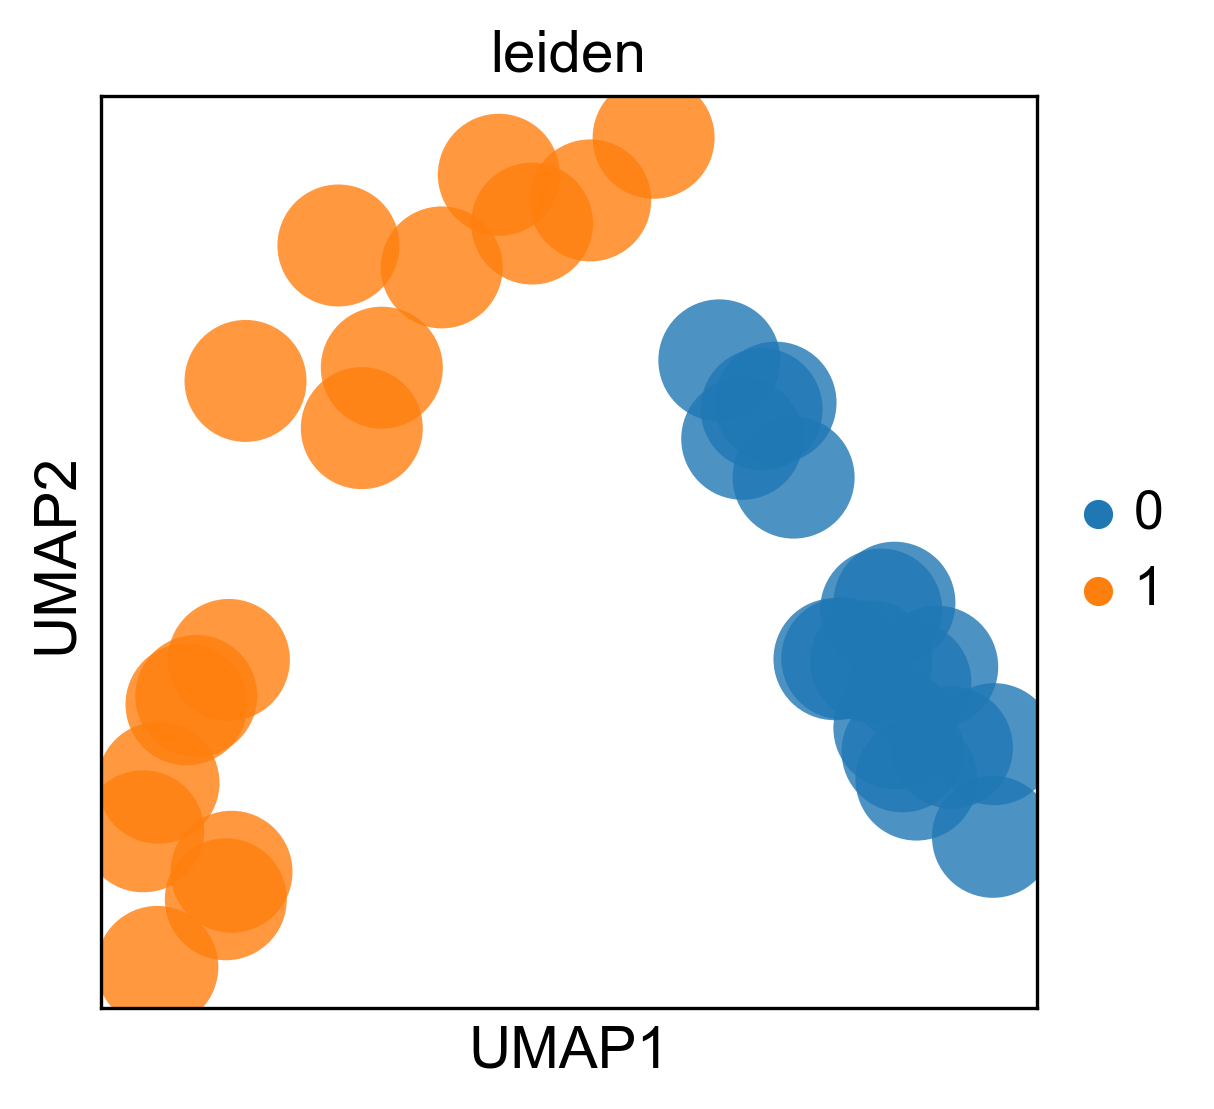

In [92]:
sc.pl.umap(adata_roi5, color=['leiden'], alpha = 0.8,ncols=1)

In [93]:
#extract marker features for each cluster
sc.tl.rank_genes_groups(adata_roi5, groupby='leiden',method='wilcoxon',use_raw=False)
markers = pd.DataFrame(adata_roi5.uns['rank_genes_groups']['names']).head(10)
markers

/Users/margaret/miniconda3/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


,0,1
0,correlations_GluA2-Homerref10,correlations_Homerref8-Vgat
1,correlations_RIMBP-Gephyrin,correlations_RIMBP-Cav2.1
2,correlations_PSD95R6-Vglut,correlations_Homerref7-NR1
3,correlations_PSD95R6-Homerref5,correlations_Homerref7-Bassoon
4,correlations_Homerref6-SynGAP,correlations_RIMBP-Homerref6
5,correlations_Homerref6-Homerref1,correlations_RIMBP-PSD95R6
6,correlations_Homerref6-GluA1,correlations_RIMBP-Homerref5
7,correlations_Homerref6-Homerref2,correlations_RIMBP-Vgat
8,correlations_Homerref6-NR2B,correlations_RIMBP-Homerref4
9,correlations_Homerref6-Homerref3,correlations_RIMBP-PSD95


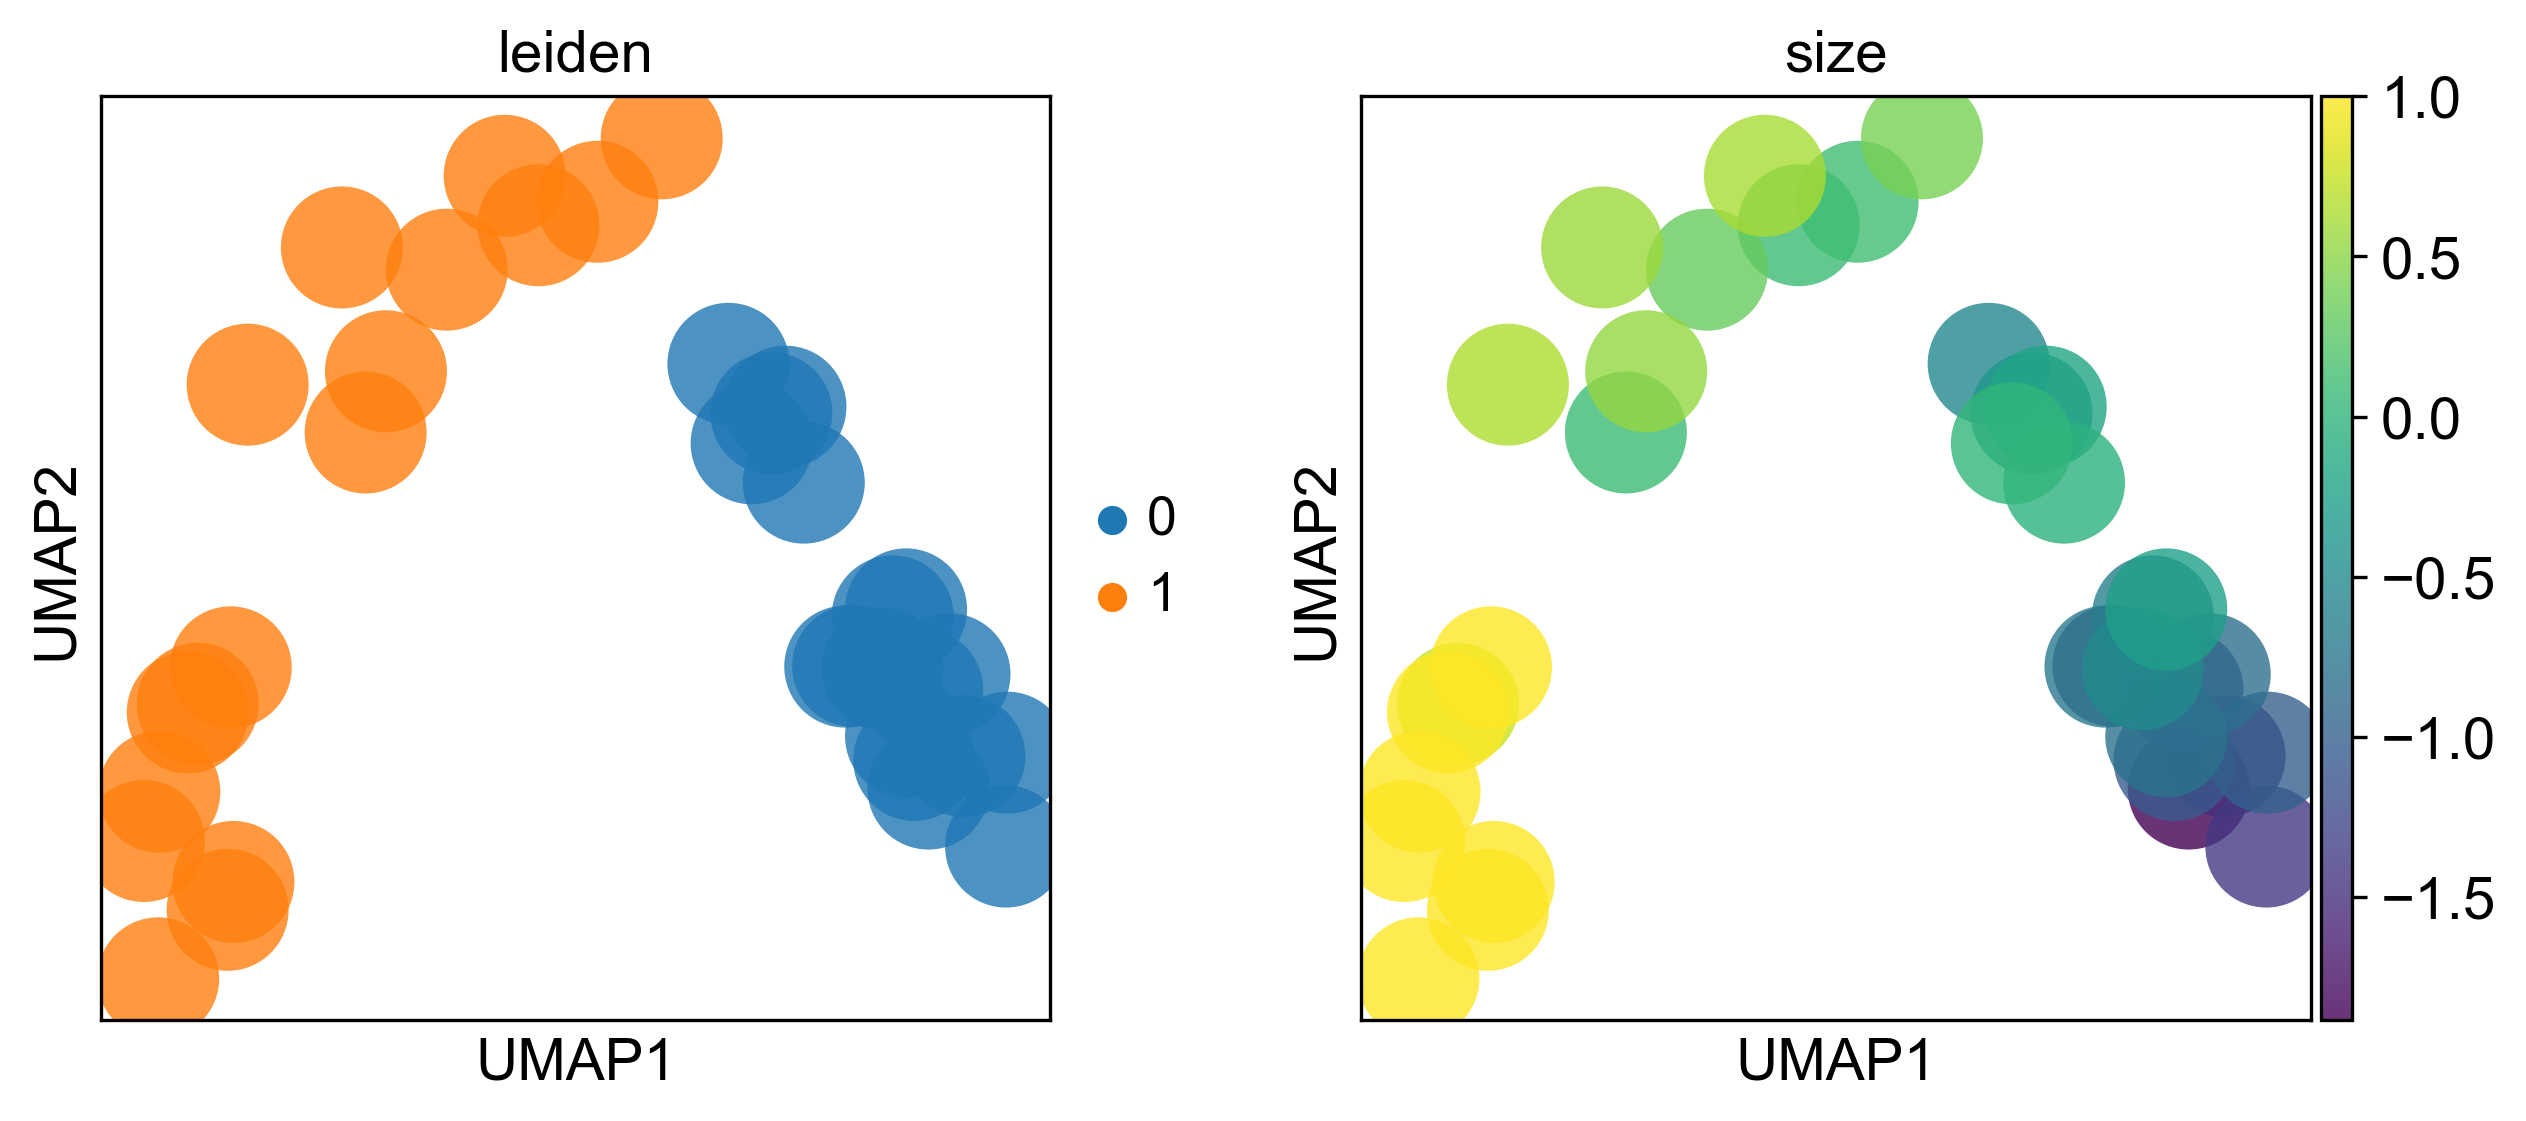

In [94]:
sc.pl.umap(adata_roi5, color=['leiden','size'],
           alpha = 0.8,ncols=2,use_raw=False)

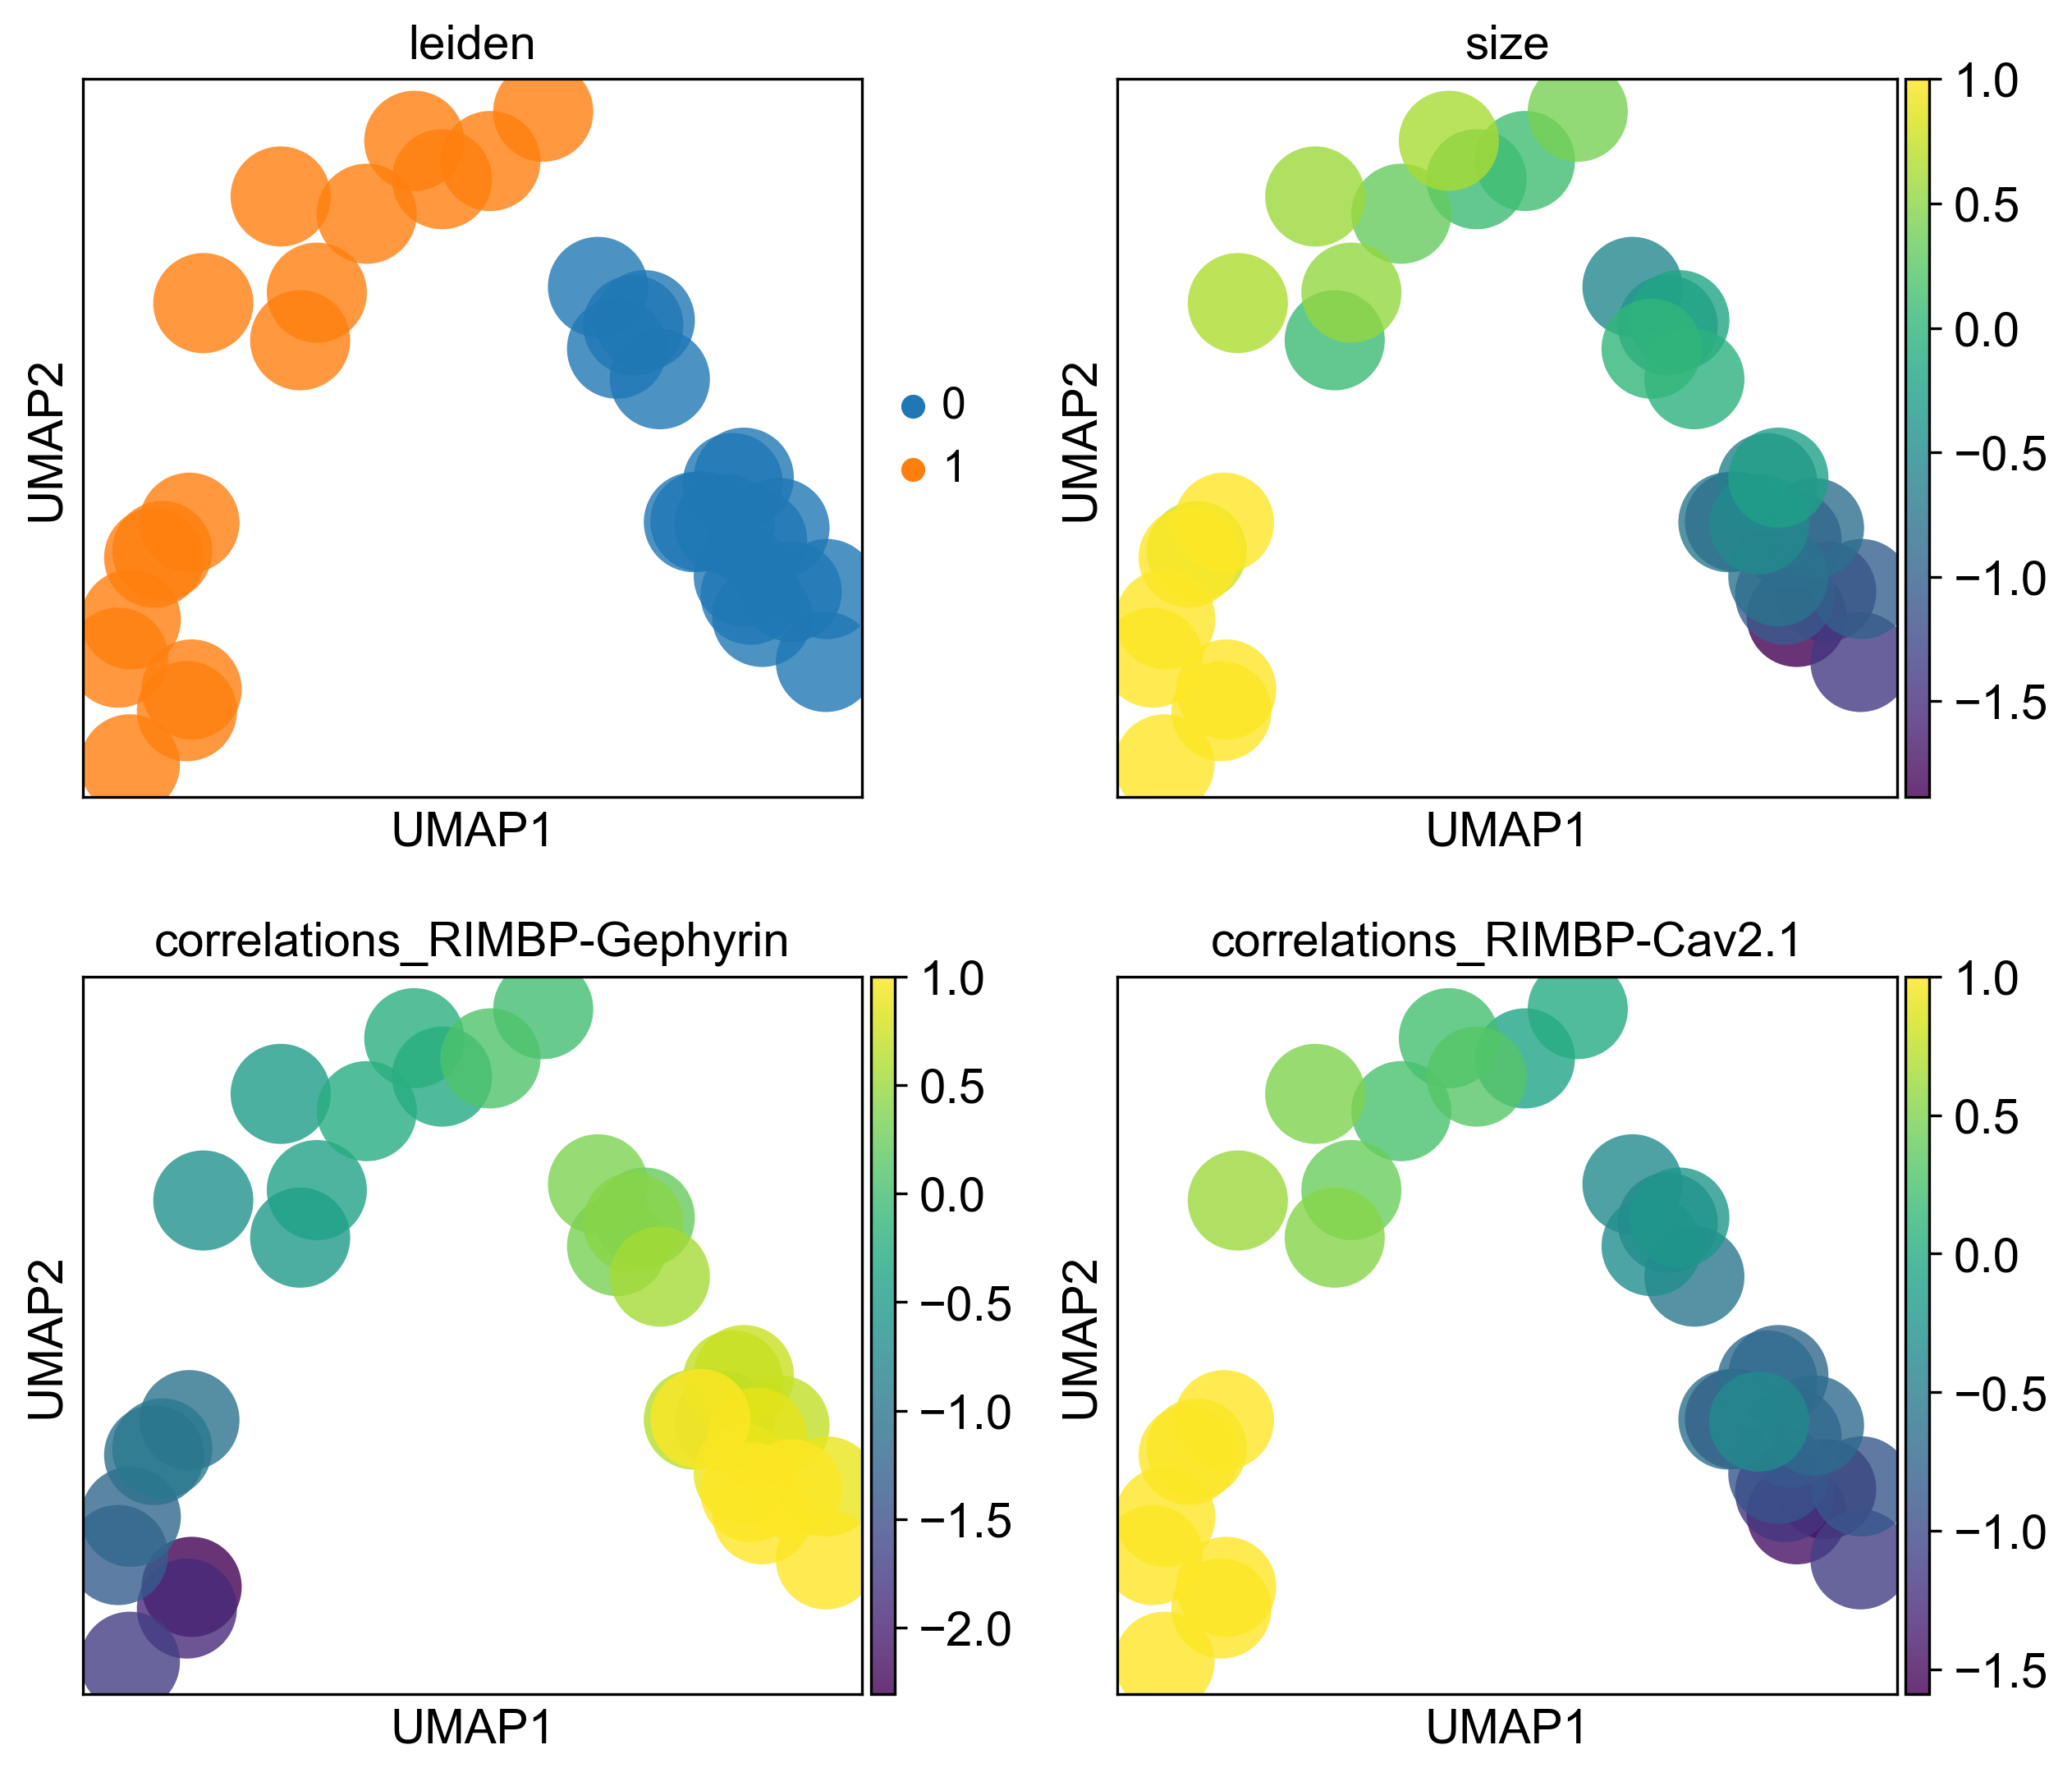

In [95]:
sc.pl.umap(adata_roi5, color=['leiden','size','correlations_RIMBP-Gephyrin','correlations_RIMBP-Cav2.1'], 
           alpha = 0.8,ncols=2,use_raw=False)

# Manually inspect synapses from each cluster

In [96]:
clusters = unique(list(adata_roi5.obs['leiden']))

In [97]:
clusters

['1', '0']

In [98]:
#select random 5 synapses from each cluster
syn_names = []
for cluster in clusters:
    chunk = adata_roi5[adata_roi5.obs['leiden']==str(cluster)]
    inds = np.random.randint(0, high=chunk.n_obs, size = 2)
    names = list(chunk.obs.index)
    for ind in inds:
        syn_names.append(names[ind])

In [99]:
syn_names

['ROI5_syn35', 'ROI5_syn25', 'ROI5_syn23', 'ROI5_syn24']

In [115]:
#look up the cluster ID of the synapses we are already plotting

#217_191 is number 9 
adata_roi5['ROI5_syn9',:].obs

,fov,leiden
ROI5_syn9,ROI5,0


In [119]:
#1875_799 is number 38
adata_roi5['ROI5_syn38',:].obs

,fov,leiden
ROI5_syn38,ROI5,1
